# SchemDraw Analog Samples
* Webpage: https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html
* Repo: https://bitbucket.org/cdelker/schemdraw
* Documentation: https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html
* Blog: https://www.collindelker.com/2014/08/29/electrical-schematic-drawing-python.html
* Sample gallery: 
  * https://cdelker.bitbucket.io/SchemDraw/gallery.html
  * https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Inverting Amplifier

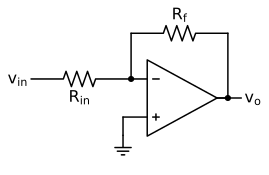

In [2]:
import matplotlib.pyplot as plt
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing(inches_per_unit=.5)
op = d.add(e.OPAMP)
d.add(e.LINE, d='left', xy=op.in2, l=d.unit/4)
d.add(e.LINE, d='down', l=d.unit/5)
d.add(e.GND)
d.add(e.LINE, d='left', xy=op.in1, l=d.unit/6)
d.add(e.DOT)
d.push()
Rin = d.add(e.RES, d='left', xy=op.in1-[d.unit/5,0], botlabel='$R_{in}$', lftlabel='$v_{in}$')
d.pop()
d.add(e.LINE, d='up', l=d.unit/2)
Rf = d.add(e.RES,  d='right', l=d.unit*1, label='$R_f$')
d.add(e.LINE, d='down', toy=op.out)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=op.out)
d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='$v_{o}$')

d.draw()

### Operational Amplifier

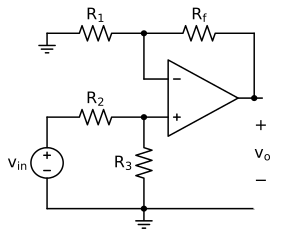

In [3]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
o = d.add(e.OPAMP)
d.add(e.LINE, xy=o.out, l=.75)
d.add(e.LINE, xy=o.in1, d='left', l=.75)
d.add(e.LINE, d='up', l=1.5)
d.add(e.DOT)
R1 = d.add(e.RES, d='left', label='$R_1$')
d.add(e.GND)
Rf = d.add(e.RES, d='right', xy=R1.start, tox=o.out+.5, label='$R_f$')
d.add(e.LINE, d='down', toy=o.out)
dot = d.add(e.DOT)
d.add(e.LINE, d='left', xy=o.in2, l=.75)
d.add(e.DOT)
R3 = d.add(e.RES, d='down', label='$R_3$')
d.add(e.DOT)
d.add(e.GND)
R2 = d.add(e.RES, d='left', xy=R3.start, label='$R_2$')
d.add(e.SOURCE_V, d='down', reverse=True, label='$v_{in}$')
d.add(e.LINE, d='right', tox=Rf.end)#tox=R3.end)
d.add(e.GAP_LABEL, d='down', xy=dot.start, toy=R3.end, label=['+','$v_o$','$-$'])
d.draw(showplot=False)

### 555 Timer

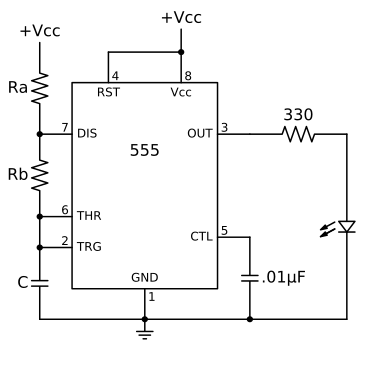

In [4]:
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

d = schem.Drawing()
left = {'cnt':3,
        'labels':['TRG','THR','DIS'],
        'plabels':['2','6','7'],
        'loc':[.2,.35,.75],
        'lblsize':12,
        }
right = {'cnt':2,
         'labels':['CTL','OUT'],
         'plabels':['5','3'],
        'lblsize':12,
         }
top = {'cnt':2,
       'labels':['RST','Vcc'],
       'plabels':['4','8'],
       'lblsize':12,
       }
bot = {'cnt':1,
       'labels':['GND'],
       'plabels':['1'],
       'lblsize':12,
        }

IC555 = e.blackbox(d.unit*1.5, d.unit*2.25, 
                   linputs=left, rinputs=right, tinputs=top, binputs=bot,
                   leadlen=1, mainlabel='555')
T = d.add(IC555)
BOT = d.add(e.GND, xy=T.GND)  # Note: Anchors named same as pin labels
d.add(e.DOT)
d.add(e.RES, endpts=[T.DIS, T.THR], label='Rb')
d.add(e.RES, d='up', xy=T.DIS, label='Ra', rgtlabel='+Vcc')
d.add(e.LINE, endpts=[T.THR, T.TRG])
d.add(e.CAP, xy=T.TRG, d='down', toy=BOT.start, label='C', l=d.unit/2)
d.add(e.LINE, d='right', tox=BOT.start)
d.add(e.CAP, d='down', xy=T.CTL, toy=BOT.start, botlabel='.01$\mu$F')
d.add(e.DOT)
d.add(e.DOT, xy=T.DIS)
d.add(e.DOT, xy=T.THR)
d.add(e.DOT, xy=T.TRG)
d.add(e.LINE, endpts=[T.RST,T.Vcc])
d.add(e.DOT)
d.add(e.LINE, d='up', l=d.unit/4, rgtlabel='+Vcc')
d.add(e.RES, xy=T.OUT, d='right', label='330')
d.add(e.LED, flip=True, d='down', toy=BOT.start)
d.add(e.LINE, d='left', tox=BOT.start)
d.draw()

## Electrical Circuit

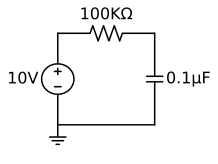

In [5]:
import SchemDraw as schem
import SchemDraw.elements as e
d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='10V')
d.add(e.RES, d='right', label='100K$\Omega$')
d.add(e.CAP, d='down', botlabel='0.1$\mu$F')
d.add(e.LINE, to=V1.start)
d.add(e.GND)
d.draw()

### Charging capacitor

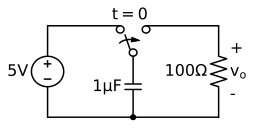

In [6]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='5V')
d.add(e.LINE, d='right', l=d.unit*.75)
S1 = d.add(e.SWITCH_SPDT2_CLOSE, d='up', anchor='b', rgtlabel='$t=0$')
d.add(e.LINE, d='right', xy=S1.c,  l=d.unit*.75)
d.add(e.RES, d='down', label='$100\Omega$', botlabel=['+','$v_o$','-'])
d.add(e.LINE, to=V1.start)
d.add(e.CAP, xy=S1.a, d='down', toy=V1.start, label='1$\mu$F')
d.add(e.DOT)
d.draw(showplot=False)

### Loop Currents

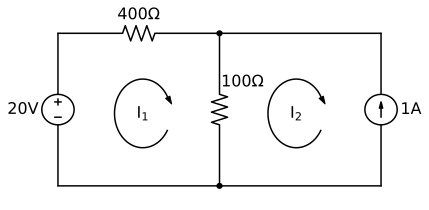

In [7]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing(unit=5)
V1 = d.add(e.SOURCE_V, label='$20V$')
R1 = d.add(e.RES, d='right', label='400$\Omega$')
d.add(e.DOT)
d.push()
R2 = d.add(e.RES, d='down')
R2.add_label('100$\Omega$', loc='center', ofst=[-.9,.05])
d.add(e.DOT)
d.pop()
L1 = d.add(e.LINE)
I1 = d.add(e.SOURCE_I, d='down', botlabel='1A')
L2 = d.add(e.LINE, d='left', tox=V1.start)
d.loopI([R1,R2,L2,V1], '$I_1$', pad=1.25)
d.loopI([R1,I1,L2,R2], '$I_2$', pad=1.25)  # Use R1 as top element for both so they get the same height
d.draw(showplot=False)

### Source-Measure-Unit (SMU)

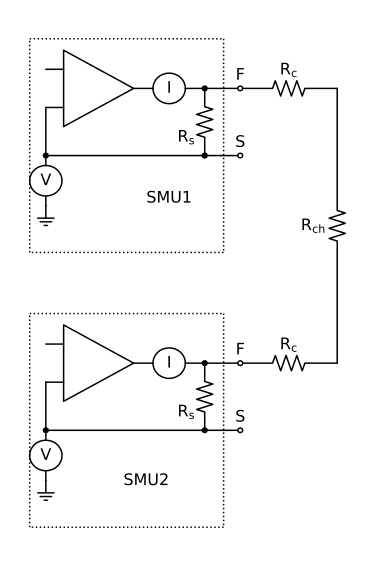

In [8]:
# Another example of grouping elements together. This one defines anchors within the group. 
import SchemDraw as schem
import SchemDraw.elements as e
import numpy as np

# Build a drawing of an SMU
smugp = schem.Drawing(unit=2.2)
smugp.add(e.LINE, d='right', l=smugp.unit/4)
O1 = smugp.add(e.OPAMP_NOSIGN, anchor='in1')
I = smugp.add(e.METER_I, d='right', xy=O1.out)
smugp.add(e.DOT)
smugp.push()
smugp.add(e.LINE, l=smugp.unit/2)
F = smugp.add(e.DOT_OPEN, toplabel='F')
smugp.pop()
Rs = smugp.add(e.RES, d='down')
Rs.add_label('$R_s$', loc='center', ofst=[.5,-.3], align=('right','center'))
smugp.add(e.DOT)
smugp.push()
smugp.add(e.LINE, l=smugp.unit/2)
S = smugp.add(e.DOT_OPEN, toplabel='S')
smugp.pop()
smugp.add(e.LINE, d='left', tox=O1.in2[0]-smugp.unit/4)
smugp.add(e.DOT)
smugp.push()
smugp.add(e.LINE, d='up', toy=O1.in2)
smugp.add(e.LINE, d='right', tox=O1.in2)
smugp.pop()
V = smugp.add(e.METER_V, d='down', l=smugp.unit*.75)
GND = smugp.add(e.GND)

anchors = {
    'inpt':[0,0],
    'F':F.end,
    'S':S.end,
    'name':[I.center[0],GND.start[1]] }

#smugp.draw()  # Could draw the SMU by itself now.
gp = schem.group_elements(smugp, anchors=anchors)

def boxsmu(d, smu):
    ''' Draw a dotted box around the SMU element '''
    topleft = smu.inpt + np.array([-.5,1])
    d.add(e.LINE, xy=topleft, tox=topleft[0]+6, d='right', ls=':')
    d.add(e.LINE, d='down', toy=topleft[1]-7, ls=':')
    d.add(e.LINE, d='left', tox=topleft[0], ls=':')
    d.add(e.LINE, d='up',   toy=topleft[1], ls=':')


# Create a new drawing and add a couple SMUs to it.
d = schem.Drawing()
S1 = d.add(gp)
d.add(e.LABEL, xy=S1.name, label='SMU1')
boxsmu(d, S1)
d.add(e.RES, xy=S1.F, d='right', label='$R_c$')
d.add(e.RES, d='down', label='$R_{ch}$', l=d.unit*3)
d.add(e.RES, d='left', label='$R_c$')
S2 = d.add(gp, anchor='F', d='right')
boxsmu(d, S2)
d.add(e.LABEL, xy=S2.name, label='SMU2')
d.draw(showplot=False)

### SR Latch

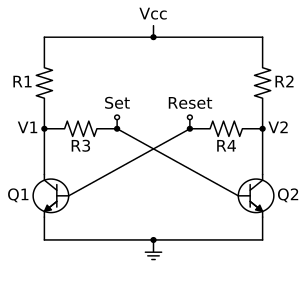

In [9]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
Q1 = d.add(e.BJT_NPN_C, reverse=True, lftlabel='Q1')
Q2 = d.add(e.BJT_NPN_C, xy=[d.unit*2,0], label='Q2')
d.add(e.LINE, xy=Q1.collector, d='up', l=d.unit/2)

R1 = d.add(e.RES, d='up', label='R1', move_cur=False)
d.add(e.DOT, lftlabel='V1')
d.add(e.RES, d='right', botlabel='R3', l=d.unit*.75)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=d.unit/8)
d.add(e.DOT_OPEN, label='Set')
d.pop()
d.add(e.LINE, to=Q2.base)

d.add(e.LINE, xy=Q2.collector, d='up', l=d.unit/2)
d.add(e.DOT, rgtlabel='V2')
R2 = d.add(e.RES, d='up', botlabel='R2', move_cur=False)
d.add(e.RES, d='left', botlabel='R4', l=d.unit*.75)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=d.unit/8)
d.add(e.DOT_OPEN, label='Reset')
d.pop()
d.add(e.LINE, to=Q1.base)

d.add(e.LINE, xy=Q1.emitter, d='down', l=d.unit/4)
BOT = d.add(e.LINE, d='right', tox=Q2.emitter)
d.add(e.LINE, to=Q2.emitter)
d.add(e.DOT, xy=BOT.center)
d.add(e.GND, xy=BOT.center)

TOP = d.add(e.LINE, endpts=[R1.end,R2.end])
d.add(e.DOT, xy=TOP.center)
d.add(e.LINE, xy=TOP.center, d='up', l=d.unit/8, rgtlabel='Vcc')
d.draw(showplot=False)

### Resistor circle

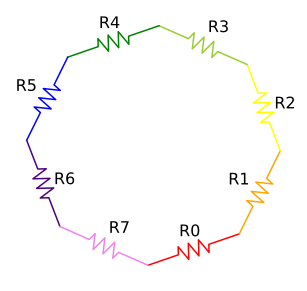

In [10]:
import SchemDraw as schem
import SchemDraw.elements as e

colors = ['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']
d = schem.Drawing()
for i in range(8):
    d.add(e.RES, label='R%d'%i, theta=45*i+20, color=colors[i])
d.draw(showplot=False)

### Power Supply

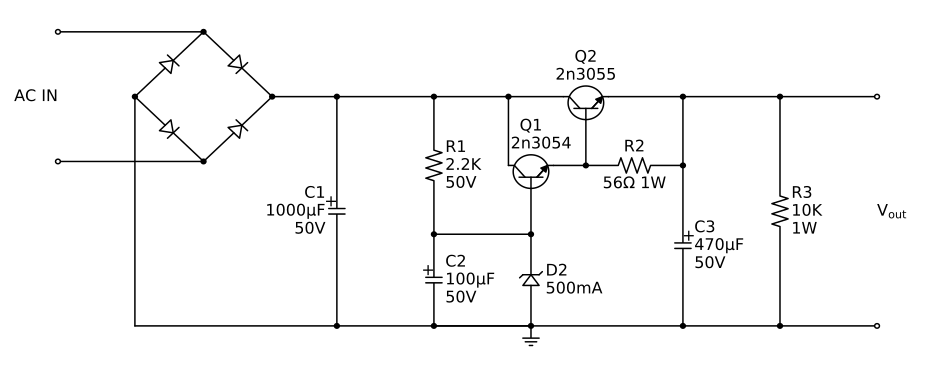

In [11]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing(inches_per_unit=.5, unit=3)
D1 = d.add(e.DIODE, theta=-45)
d.add(e.DOT)
D2 = d.add(e.DIODE, theta=225, reverse=True)
d.add(e.DOT)
D3 = d.add(e.DIODE, theta=135, reverse=True)
d.add(e.DOT)
D4 = d.add(e.DIODE, theta=45)
d.add(e.DOT)

d.add(e.LINE, xy=D3.end, d='left', l=d.unit*1.5)
d.add(e.DOT_OPEN)
d.add(e.GAP, d='up', toy=D1.start, label='AC IN')
d.add(e.LINE, xy=D4.end, d='left', l=d.unit*1.5)
d.add(e.DOT_OPEN)

top = d.add(e.LINE, xy=D2.end, d='right', l=d.unit*3)
Q2 = d.add(e.BJT_NPN_C, anchor='collector', d='up', label='Q2\n2n3055')
d.add(e.LINE, xy=Q2.base, d='down', l=d.unit/2)
Q2b = d.add(e.DOT)
d.add(e.LINE, d='left', l=d.unit/3)
Q1 = d.add(e.BJT_NPN_C, anchor='emitter', d='up', label='Q1\n    2n3054')
d.add(e.LINE, d='up', xy=Q1.collector, toy=top.center)
d.add(e.DOT)

d.add(e.LINE, d='down', xy=Q1.base, l=d.unit/2)
d.add(e.DOT)
d.add(e.ZENER, d='down', reverse=True, botlabel='D2\n500mA')
d.add(e.DOT)
G = d.add(e.GND)
d.add(e.LINE, d='left')
d.add(e.DOT)
d.add(e.CAP_P, botlabel='C2\n100$\mu$F\n50V', d='up', reverse=True)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='right')
d.pop()
d.add(e.RES, d='up', toy=top.end, botlabel='R1\n2.2K\n50V')
d.add(e.DOT)

d.here = [d.here[0]-d.unit, d.here[1]]
d.add(e.DOT)
d.add(e.CAP_P, d='down', toy=G.start, label='C1\n 1000$\mu$F\n50V', flip=True)
d.add(e.DOT)
d.add(e.LINE, xy=G.start, tox=D4.start, d='left')
d.add(e.LINE, d='up', toy=D4.start)

d.add(e.RES, d='right', xy=Q2b.center, label='R2', botlabel='56$\Omega$ 1W')
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', toy=top.start)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Q2.emitter)
d.pop()
d.add(e.CAP_P, d='down', toy=G.start, botlabel='C3\n470$\mu$F\n50V')
d.add(e.DOT)
d.add(e.LINE, d='left', tox=G.start, move_cur=False)
d.add(e.LINE, d='right')
d.add(e.DOT)
d.add(e.RES, d='up', toy=top.center, botlabel='R3\n10K\n1W')
d.add(e.DOT)
d.add(e.LINE, d='left', move_cur=False)
d.add(e.LINE, d='right')
d.add(e.DOT_OPEN)
d.add(e.GAP, d='down', toy=G.start, label='$V_{out}$')
d.add(e.DOT_OPEN)
d.add(e.LINE, d='left')

d.draw(showplot=False)

### 741 Op-Amp

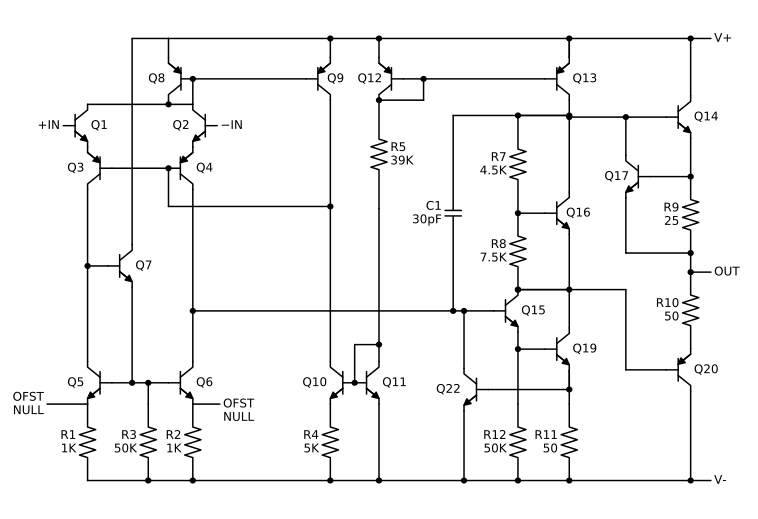

In [12]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing(fontsize=12, unit=2.5)
Q1 = d.add(e.BJT_NPN, label='Q1', lftlabel='+IN')
Q3 = d.add(e.BJT_PNP, xy=Q1.emitter, anchor='emitter', lftlabel='Q3', flip=True, d='left')
d.add(e.LINE, d='down', xy=Q3.collector)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='right', l=d.unit/4)
Q7 = d.add(e.BJT_NPN, anchor='base', label='Q7')
d.pop()
d.add(e.LINE, d='down', l=d.unit*1.25)
Q5 = d.add(e.BJT_NPN, anchor='collector', d='left', flip=True, lftlabel='Q5')
d.add(e.LINE, d='left', xy=Q5.emitter, l=d.unit/2, lftlabel='OFST\nNULL', move_cur=False)
d.add(e.RES, d='down', xy=Q5.emitter, label='R1\n1K')
d.add(e.LINE, d='right', l=d.unit*.75)
d.add(e.DOT)
R3 = d.add(e.RES, d='up', label='R3\n50K')
d.add(e.LINE, toy=Q5.base)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='left', to=Q5.base)
d.add(e.LINE, xy=Q7.emitter, d='down', toy=Q5.base)
d.add(e.DOT)
d.pop()
d.add(e.LINE, d='right', l=d.unit/4)
Q6 = d.add(e.BJT_NPN, anchor='base', label='Q6')
d.add(e.LINE, xy=Q6.emitter, l=d.unit/3, rgtlabel='\nOFST\nNULL', move_cur=False)
d.add(e.RES, xy=Q6.emitter, d='down', label='R2\n1K')
d.add(e.DOT)

d.add(e.LINE, xy=Q6.collector, d='up', toy=Q3.collector)
Q4 = d.add(e.BJT_PNP, anchor='collector', d='right', label='Q4')
d.add(e.LINE, xy=Q4.base, d='left', tox=Q3.base)
d.add(e.LINE, xy=Q4.emitter, d='up', toy=Q1.emitter)
Q2 = d.add(e.BJT_NPN, anchor='emitter', d='left', flip=True, lftlabel='Q2', rgtlabel='$-$IN')
d.add(e.LINE, xy=Q2.collector, d='up', l=d.unit/3)
d.add(e.DOT)
Q8 = d.add(e.BJT_PNP, lftlabel='Q8', anchor='base', d='left', flip=True)
d.add(e.LINE, xy=Q8.collector, d='down', toy=Q2.collector)
d.add(e.DOT)
d.add(e.LINE, d='left', xy=Q2.collector, tox=Q1.collector)
d.add(e.LINE, d='up', xy=Q8.emitter, l=d.unit/4)
top = d.add(e.LINE, d='left', tox=Q7.collector)
d.add(e.LINE, d='down', toy=Q7.collector)

d.add(e.LINE, d='right', xy=top.start, l=d.unit*2)
d.add(e.LINE, d='down', l=d.unit/4)
Q9 = d.add(e.BJT_PNP, anchor='emitter', d='right', label='Q9', lblofst=-.1)
d.add(e.LINE, d='left', xy=Q9.base, tox=Q8.base)
d.add(e.DOT, xy=Q4.base)
d.add(e.LINE, xy=Q4.base, d='down', l=d.unit/2)
d.add(e.LINE, d='right', tox=Q9.collector)
d.add(e.DOT)
d.add(e.LINE, xy=Q9.collector, d='down', toy=Q6.collector)
Q10 = d.add(e.BJT_NPN, anchor='collector', d='left', flip=True, lftlabel='Q10')
d.add(e.RES, d='down', xy=Q10.emitter, toy=R3.start, label='R4\n5K')
d.add(e.DOT)

Q11 = d.add(e.BJT_NPN, xy=Q10.base, anchor='base', label='Q11')
d.add(e.DOT, xy=Q11.base)
d.add(e.LINE, d='up', l=d.unit/2)
d.add(e.LINE, d='right', tox=Q11.collector)
d.add(e.DOT)
d.add(e.LINE, d='down', xy=Q11.emitter, toy=R3.start)
d.add(e.DOT)
d.add(e.LINE, d='up', xy=Q11.collector, l=d.unit*2)
d.add(e.RES, toy=Q9.collector, botlabel='R5\n39K')
Q12 = d.add(e.BJT_PNP, anchor='collector', d='left', flip=True, lftlabel='Q12', lblofst=-.1)
d.add(e.LINE, d='up', xy=Q12.emitter, l=d.unit/4)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Q9.emitter)
d.add(e.DOT)
d.add(e.LINE, d='right', xy=Q12.base, l=d.unit/4)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='down', toy=Q12.collector)
d.add(e.LINE, d='left', tox=Q12.collector)
d.add(e.DOT)
d.pop()
d.add(e.LINE, d='right', l=d.unit*1.5)
Q13 = d.add(e.BJT_PNP, anchor='base', label='Q13')
d.add(e.LINE, d='up', l=d.unit/4)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Q12.emitter)
K = d.add(e.LINE, d='down', xy=Q13.collector, l=d.unit/5)
d.add(e.DOT)
d.add(e.LINE, d='down')
Q16 = d.add(e.BJT_NPN, anchor='collector', d='right', label='Q16', lblofst=-.1)
d.add(e.LINE, xy=Q16.base, d='left', l=d.unit/3)
d.add(e.DOT)
R7 = d.add(e.RES, d='up', toy=K.end, label='R7\n4.5K')
d.add(e.DOT)
d.add(e.LINE, d='right', tox=Q13.collector, move_cur=False)
R8 = d.add(e.RES, d='down', xy=R7.start, label='R8\n7.5K')
d.add(e.DOT)
d.add(e.LINE, d='right', tox=Q16.emitter)
J = d.add(e.DOT)
d.add(e.LINE, d='up', toy=Q16.emitter)
Q15 = d.add(e.BJT_NPN, anchor='collector', xy=R8.end, label='Q15', d='right')
d.add(e.LINE, xy=Q15.base, d='left', l=d.unit/2)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', toy=R7.end, label='C1\n30pF')
d.add(e.LINE, d='right', tox=Q13.collector)
d.add(e.LINE, d='left', xy=C1.start, tox=Q6.collector)
d.add(e.DOT)
d.add(e.LINE, d='down', xy=J.center, l=d.unit/2)
Q19 = d.add(e.BJT_NPN, anchor='collector', d='right', label='Q19')
d.add(e.LINE, xy=Q19.base, d='left', tox=Q15.emitter)
d.add(e.DOT)
d.add(e.LINE, d='up', toy=Q15.emitter, move_cur=False)
d.add(e.LINE, xy=Q19.emitter, d='down', l=d.unit/4)
d.add(e.DOT)
d.add(e.LINE, d='left')
Q22 = d.add(e.BJT_NPN, anchor='base', d='left', flip=True, lftlabel='Q22')
d.add(e.LINE, d='up', xy=Q22.collector, toy=Q15.base)
d.add(e.DOT)
d.add(e.LINE, d='down', xy=Q22.emitter, toy=R3.start)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=R3.start, move_cur=False)
d.add(e.LINE, d='right', tox=Q15.emitter)
d.add(e.DOT)
d.push()
d.add(e.RES, d='up', label='R12\n50K')
d.add(e.LINE, toy=Q19.base)
d.pop()
d.add(e.LINE, tox=Q19.emitter)
d.add(e.DOT)
R11 = d.add(e.RES, d='up', label='R11\n50')
d.add(e.LINE, toy=Q19.emitter)

d.add(e.LINE, xy=Q13.emitter, d='up', l=d.unit/4)
d.add(e.LINE, d='right', l=d.unit*1.5)
d.add(e.DOT)
d.add(e.LINE, l=d.unit/4, rgtlabel='V+', move_cur=False)
d.add(e.LINE, d='down', l=d.unit*.75)
Q14 = d.add(e.BJT_NPN, anchor='collector', d='right', label='Q14')
d.add(e.LINE, d='left', xy=Q14.base, l=d.unit/2)
d.push()
d.add(e.DOT)
d.add(e.LINE, d='down', l=d.unit/2)
Q17 = d.add(e.BJT_NPN, anchor='collector', d='left', flip=True, lftlabel='Q17', lblofst=-.1)
d.add(e.LINE, xy=Q17.base, d='right', tox=Q14.emitter)
d.add(e.DOT)
J = d.add(e.LINE, d='up', toy=Q14.emitter)
d.pop()
d.add(e.LINE, tox=Q13.collector)
d.add(e.DOT)
d.add(e.RES, xy=J.start, d='down', label='R9\n25')
d.add(e.DOT)
d.push()
d.add(e.LINE, d='left', tox=Q17.emitter)
d.add(e.LINE, d='up', toy=Q17.emitter)
d.pop()
d.add(e.LINE, d='down', l=d.unit/4)
d.add(e.DOT)
d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='OUT', move_cur=False)
d.add(e.RES, d='down', label='R10\n50')
Q20 = d.add(e.BJT_PNP, d='right', anchor='emitter', label='Q20')
d.add(e.LINE, xy=Q20.base, d='left', l=d.unit/2)
d.add(e.LINE, d='up', toy=Q15.collector)
d.add(e.LINE, d='left', tox=Q15.collector)
d.add(e.DOT)
d.add(e.LINE, xy=Q20.collector, d='down', toy=R3.start)
d.add(e.DOT)
d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='V-', move_cur=False)
d.add(e.LINE, d='left', tox=R11.start)

d.draw(showplot=False)